# Setup

In [1]:
import warnings

import numpy as np
from matplotlib import pyplot as plt

from compare_variance_residual.simulated.plotting import plot_variance_vs_residual_box, plot_variance_vs_residual_error
from compare_variance_residual.simulated.simulation import run_experiment

warnings.simplefilter(action='ignore')
plt.style.use('ggplot')

In [2]:
from himalaya.backend import set_backend

backend = set_backend("cupy", on_error="warn")

In [3]:
def plot_variance_vs_residual_xy_correlation(x, xlabel, predicted_variance: list, predicted_residual: list,
                                             unique_contributions, **kwargs):
    """
    create scatterplots of predicted variance vs predicted residual to show correlation
    """

    def scale_to_minus_one_to_one(array):
        min_val = np.min(array)
        max_val = np.max(array)
        scaled_array = 2 * (array - min_val) / (max_val - min_val) - 1
        return scaled_array

    # remove nans and infs
    predicted_variance, predicted_residual = np.nan_to_num(predicted_variance), np.nan_to_num(predicted_residual)

    # create a grid according to the number of samples
    nrows = 2
    # split the remaining plots into columns
    ncols = len(predicted_variance) // nrows
    fig, ax = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 6), squeeze=False)

    # center data around true contribution
    true_contribution = unique_contributions[0]
    predicted_variance = list(np.array(predicted_variance) - true_contribution)
    predicted_residual = list(np.array(predicted_residual) - true_contribution)

    # scale data to [-1, 1]
    predicted_variance = [scale_to_minus_one_to_one(variance) for variance in predicted_variance]
    predicted_residual = [scale_to_minus_one_to_one(residual) for residual in predicted_residual]

    for i, (variance, residual) in enumerate(zip(predicted_variance, predicted_residual)):
        ax[i // ncols, i % ncols].scatter(variance, residual, alpha=0.5)

        ax[i // ncols, i % ncols].set_title(f"{x[i]} {xlabel}")
        ax[i // ncols, i % ncols].set_xlabel("predicted variance")
        ax[i // ncols, i % ncols].set_ylabel("predicted residual")

        # add text box that displays the correlation coefficient
        corr = np.corrcoef(variance, residual)[0, 1]
        ax[i // ncols, i % ncols].text(0.05, 0.95, rf"$\rho$: {corr:.2f}",
                                       transform=ax[i // ncols, i % ncols].transAxes,
                                       fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

        lims = [-1.1, 1.1]
        ax[i // ncols, i % ncols].set_xlim(lims)
        ax[i // ncols, i % ncols].set_ylim(lims)
        # plot x=y
        ax[i // ncols, i % ncols].plot(lims, lims, 'k--')

In [4]:
def plot_experiment(variable_values, variable_name, predicted_variance, predicted_residual, n_runs,
                    unique_contributions, n_features_list, n_targets, n_samples_train, n_samples_test, noise_level,
                    random_distribution, ignore_negative_r2, use_refinement, use_ols, x_is_log=False):
    variable_infos = dict(n_runs=n_runs, n_features_list=n_features_list,
                          n_targets=n_targets, n_samples_train=n_samples_train, n_samples_test=n_samples_test,
                          noise_level=noise_level, random_distribution=random_distribution,
                          ignore_negative_r2=ignore_negative_r2, use_refinement=use_refinement, use_ols=use_ols)

    plot_variance_vs_residual_box(variable_values, variable_name, predicted_variance, predicted_residual,
                                  unique_contributions, x_is_log=x_is_log, **variable_infos)
    plot_variance_vs_residual_error(variable_values, variable_name, predicted_variance, predicted_residual,
                                    unique_contributions, x_is_log=x_is_log, **variable_infos)
    plot_variance_vs_residual_xy_correlation(variable_values, variable_name, predicted_variance, predicted_residual,
                                             unique_contributions, **variable_infos)

# Set default values to be used in the tests

In [5]:
n_observations = 10

variables = dict(
    n_runs=10,
    unique_contributions=[0.5, 0.3],
    n_features_list=[100, 100],
    n_targets=100,
    n_samples_train=100,
    n_samples_test=100,
    noise_level=0.0,
    random_distribution="normal",

    ignore_negative_r2=True,
    use_refinement=False,
    use_ols=False,
)

# Varying distributions

In [6]:
variable_name = "sampling distributions"
random_distributions = ["normal", "uniform", "exponential", "gamma", "beta", "poisson", "lognormal", "pareto"]

In [7]:
predicted_variance, predicted_residual = run_experiment(random_distributions, variable_name, **variables)

[........................................] 100% | 5.16 sec | Varying sampling distributions | 


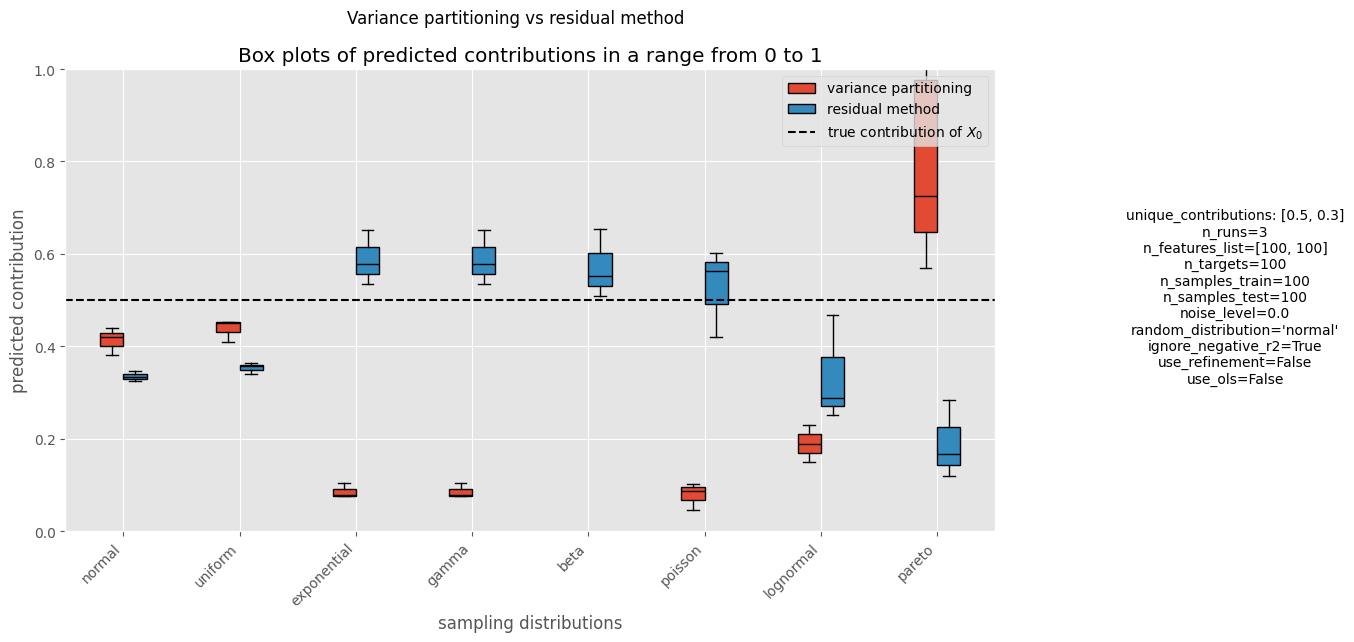

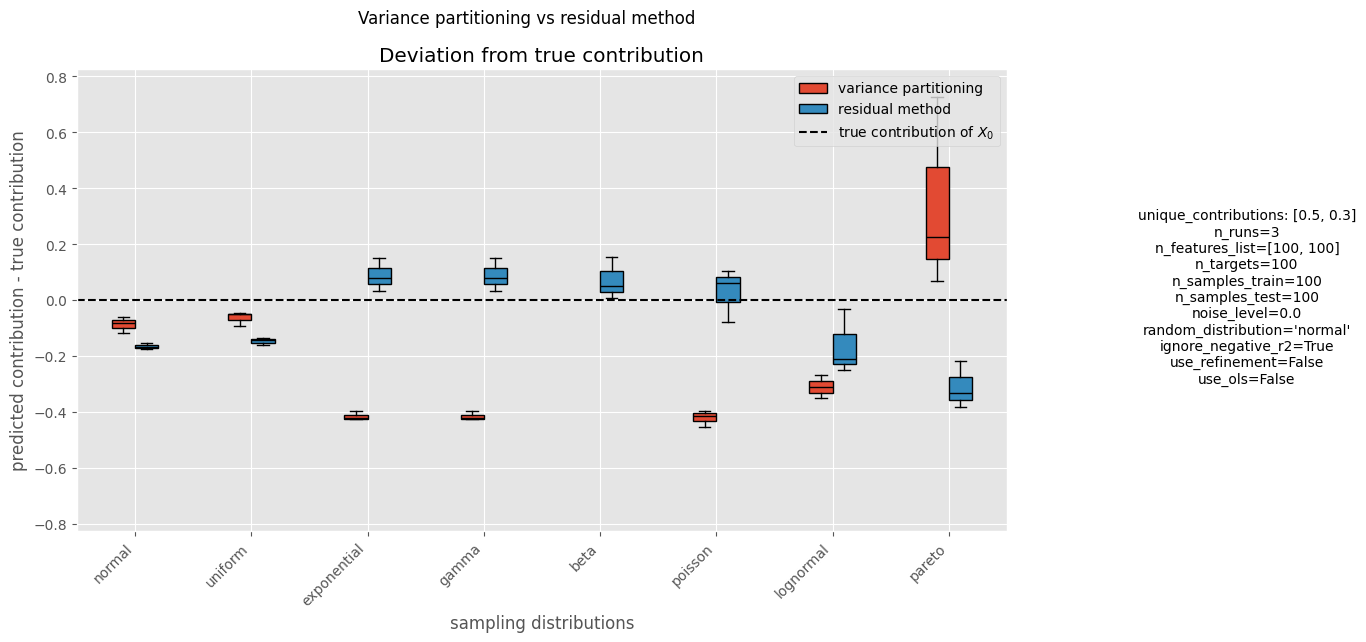

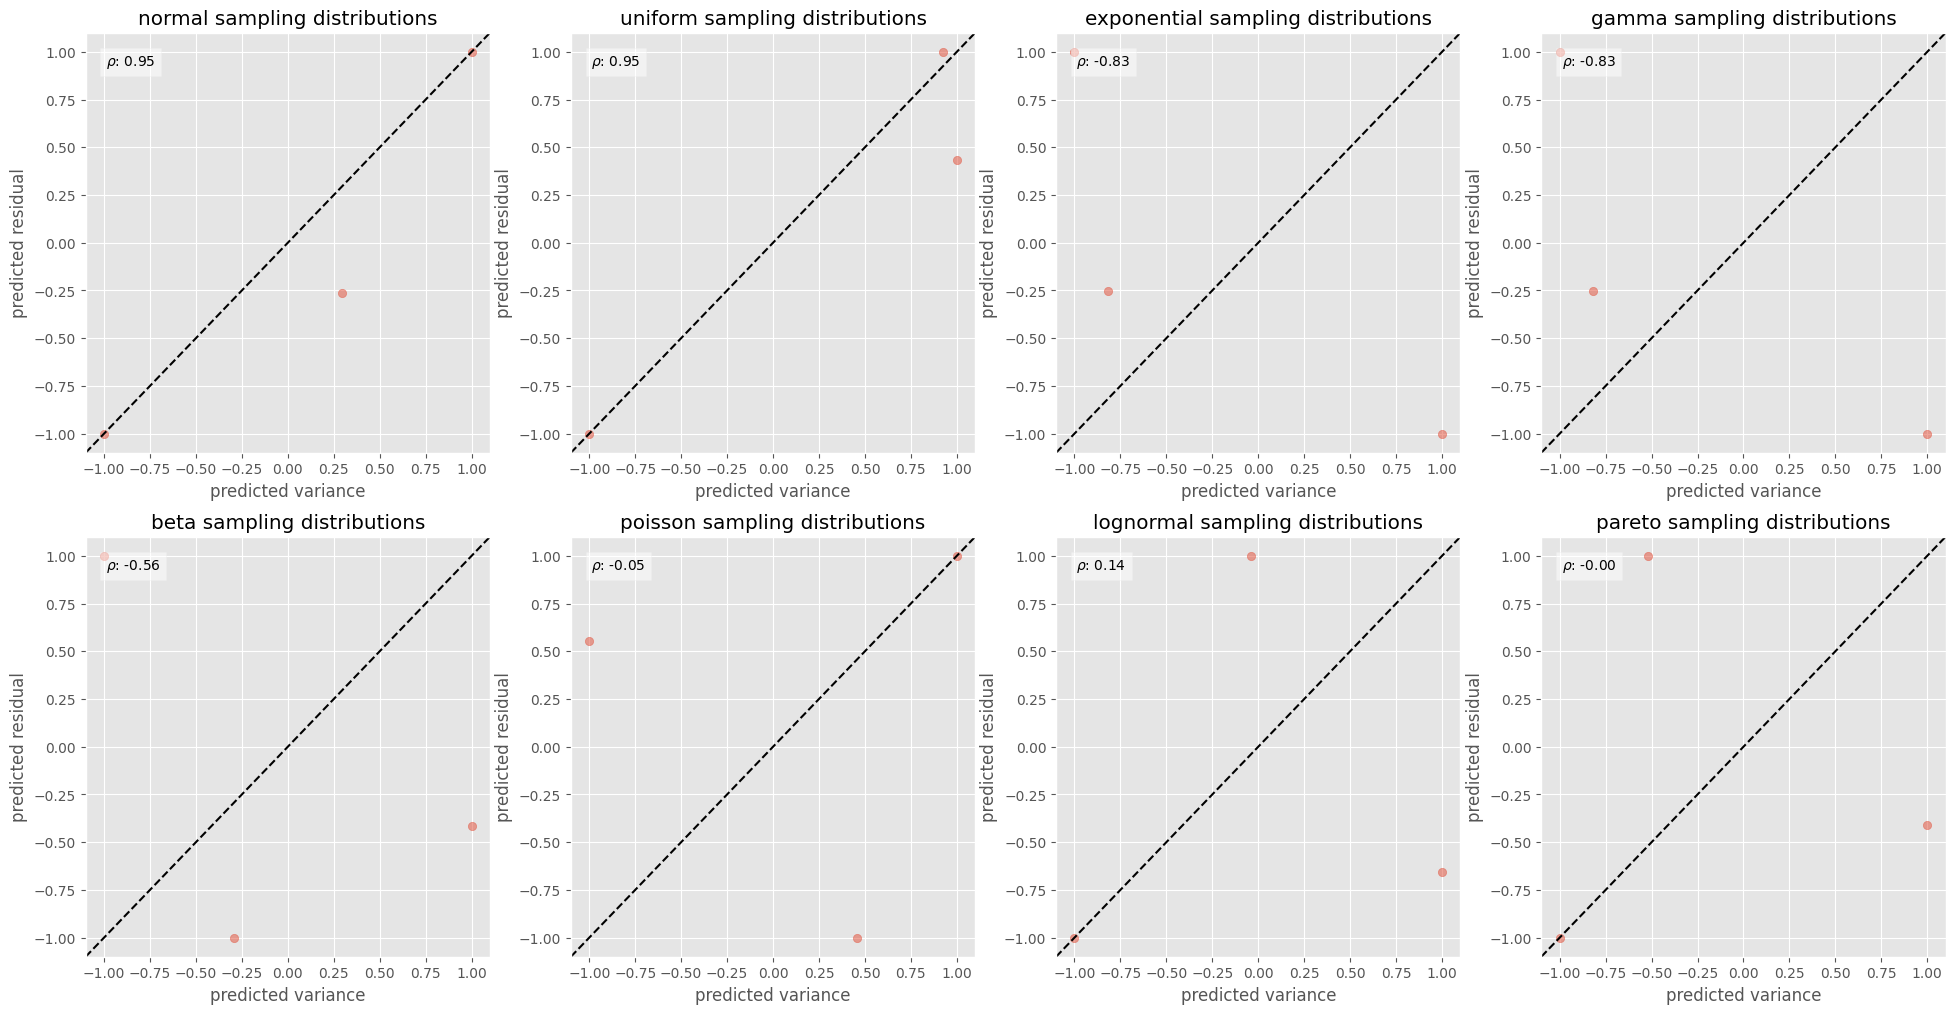

In [8]:
plot_experiment(random_distributions, variable_name, predicted_variance, predicted_residual, **variables)

# Test varying sample sizes

In [9]:
sample_sizes = np.logspace(1, 3, n_observations)

## varying train sample sizes

In [10]:
variable_name = "sample size training"

In [11]:
predicted_variance, predicted_residual = run_experiment(sample_sizes, variable_name, **variables)

[........................................] 100% | 14.49 sec | Varying sample size training | 


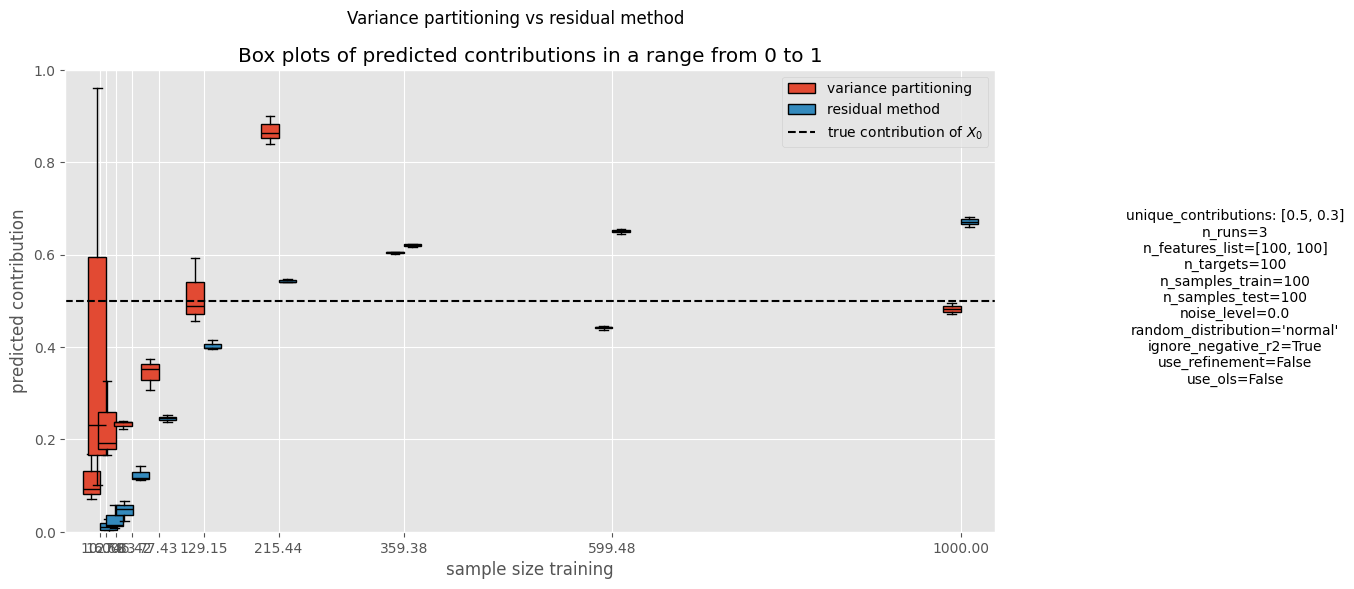

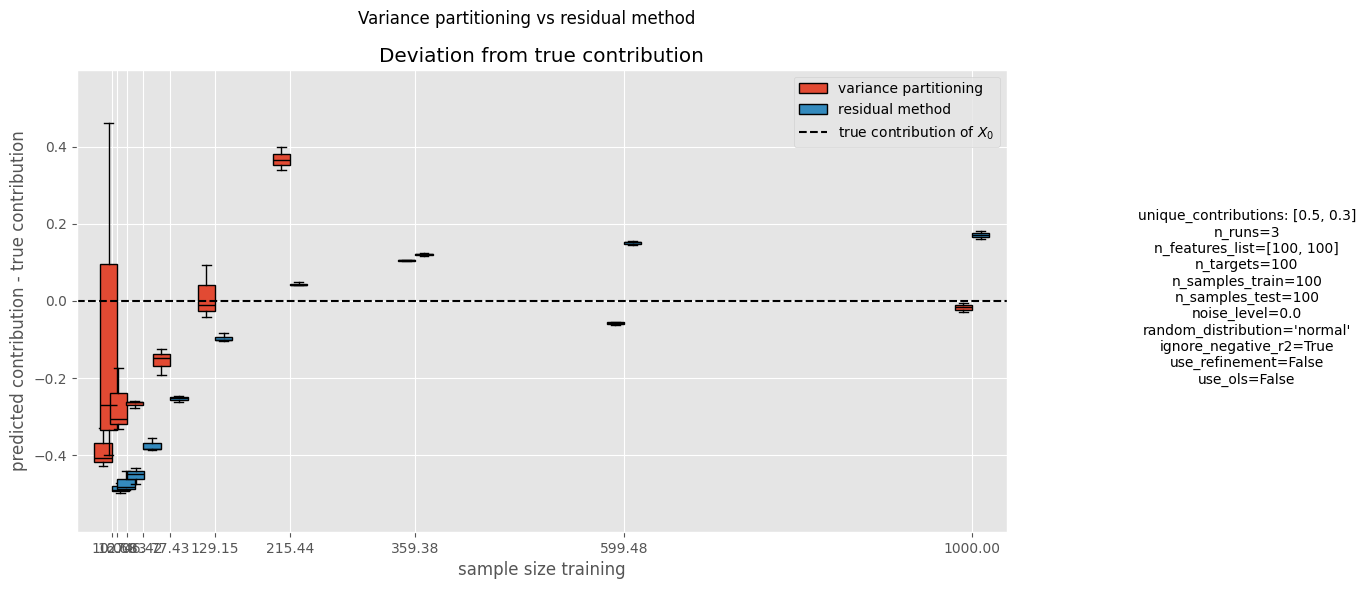

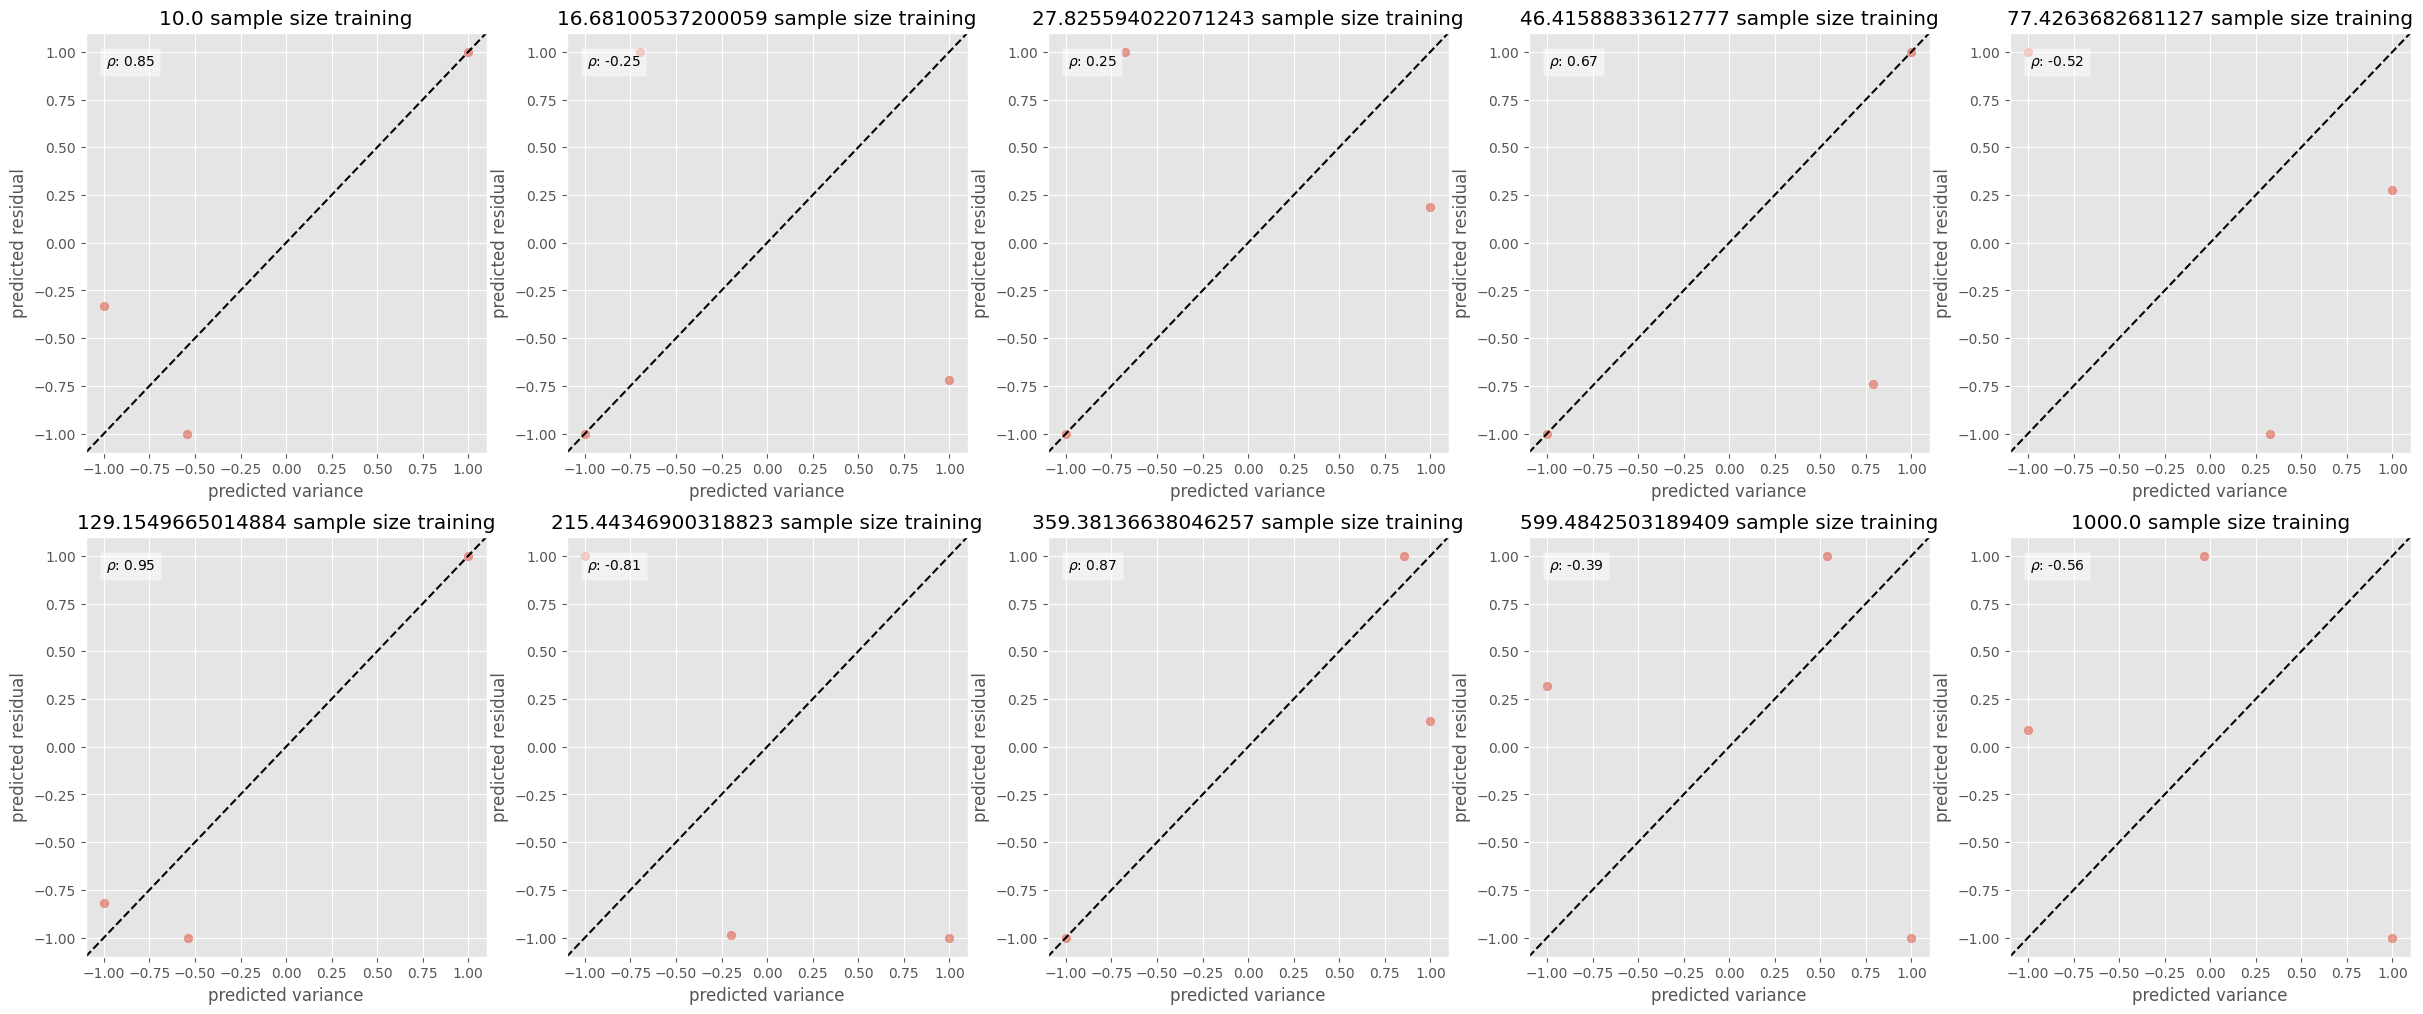

In [12]:
plot_experiment(sample_sizes, variable_name, predicted_variance, predicted_residual, **variables)

## varying test sample sizes

In [13]:
variable_name = "sample size testing"

In [14]:
predicted_variance, predicted_residual = run_experiment(sample_sizes, variable_name, **variables)

[........................................] 100% | 6.32 sec | Varying sample size testing | 


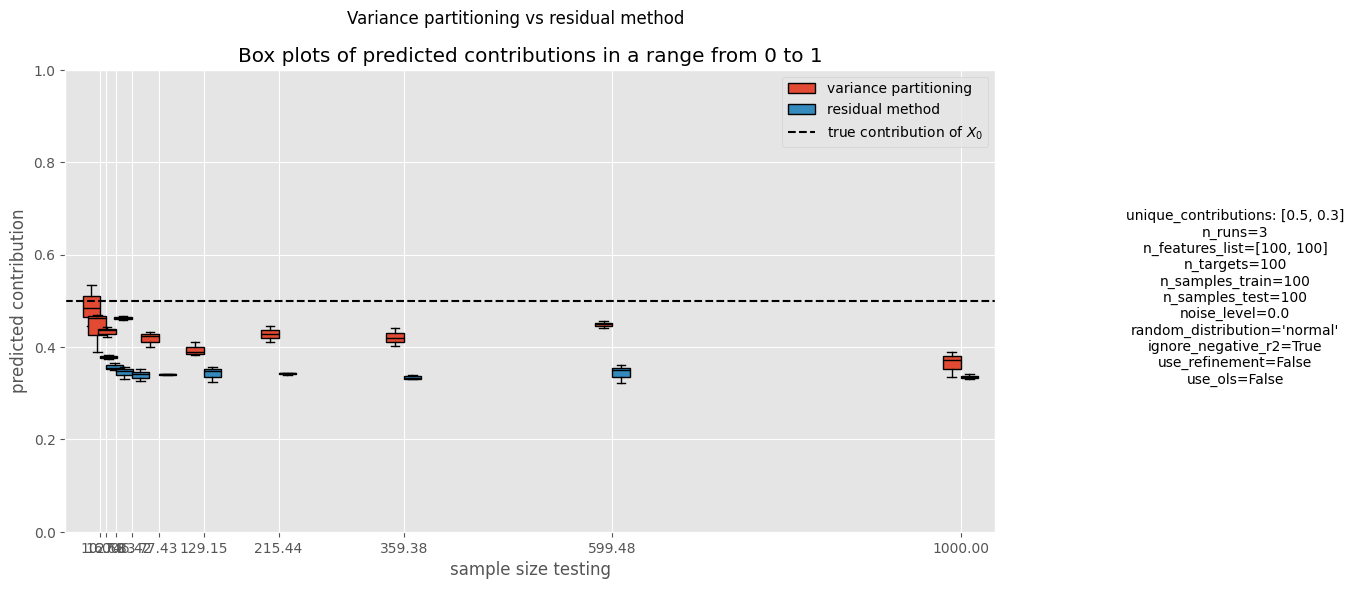

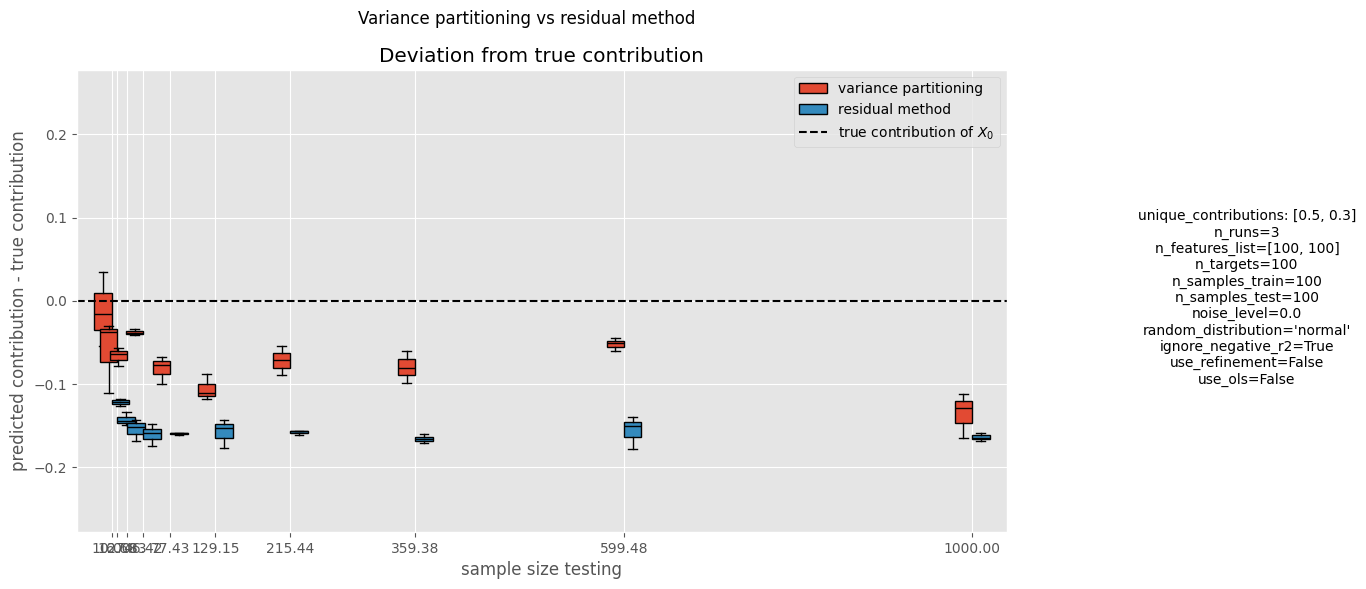

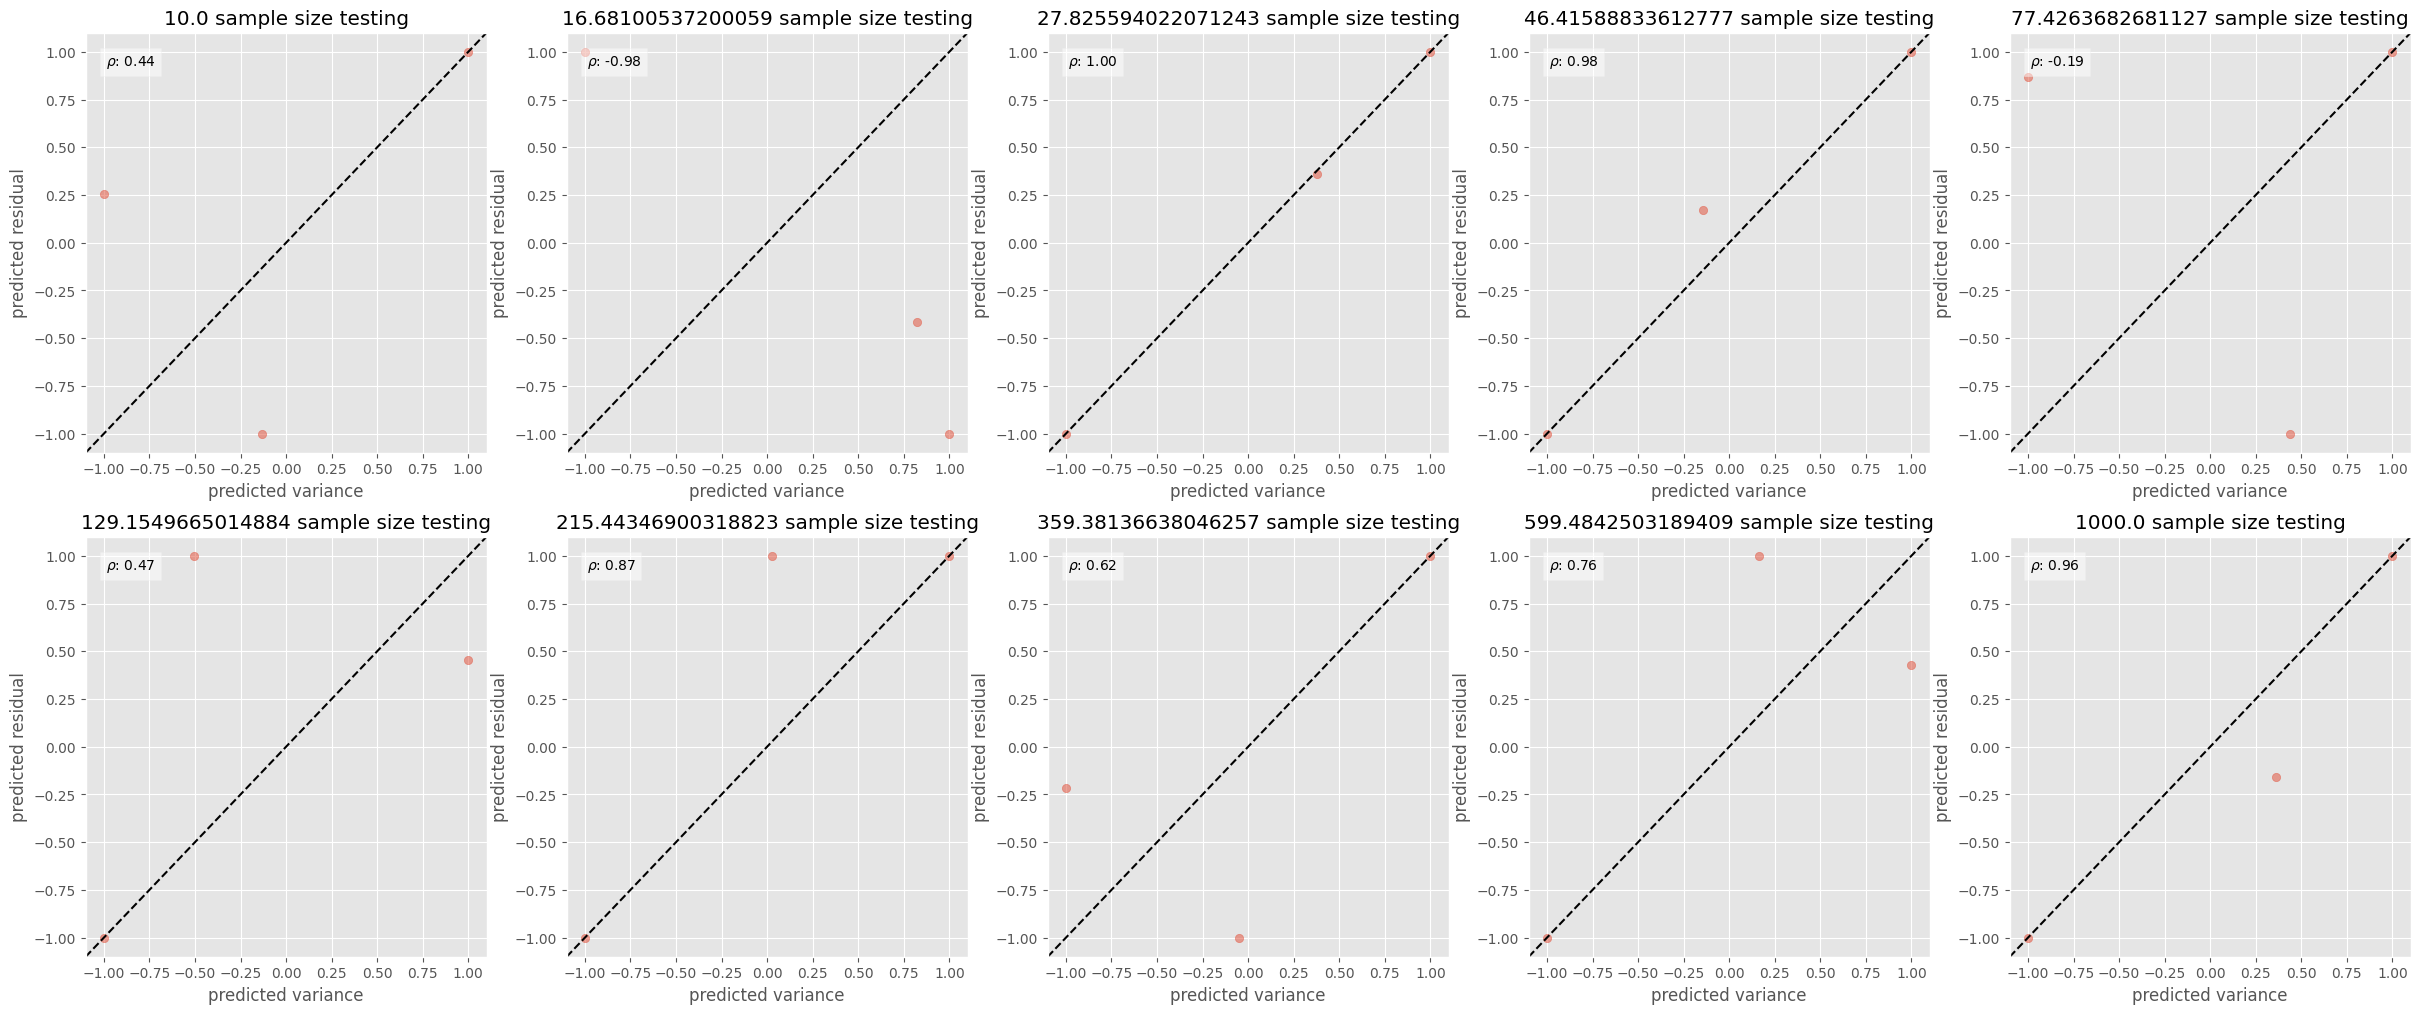

In [15]:
plot_experiment(sample_sizes, variable_name, predicted_variance, predicted_residual, **variables)

# Test varying feature sizes

In [16]:
feature_sizes = np.logspace(0, 4, n_observations)

## only $X_0$

In [17]:
variable_name = "number of features $X_{0}$"

In [18]:
predicted_variance, predicted_residual = run_experiment(feature_sizes, variable_name, **variables)

[........................................] 100% | 6.93 sec | Varying number of features $X_{0}$ | 


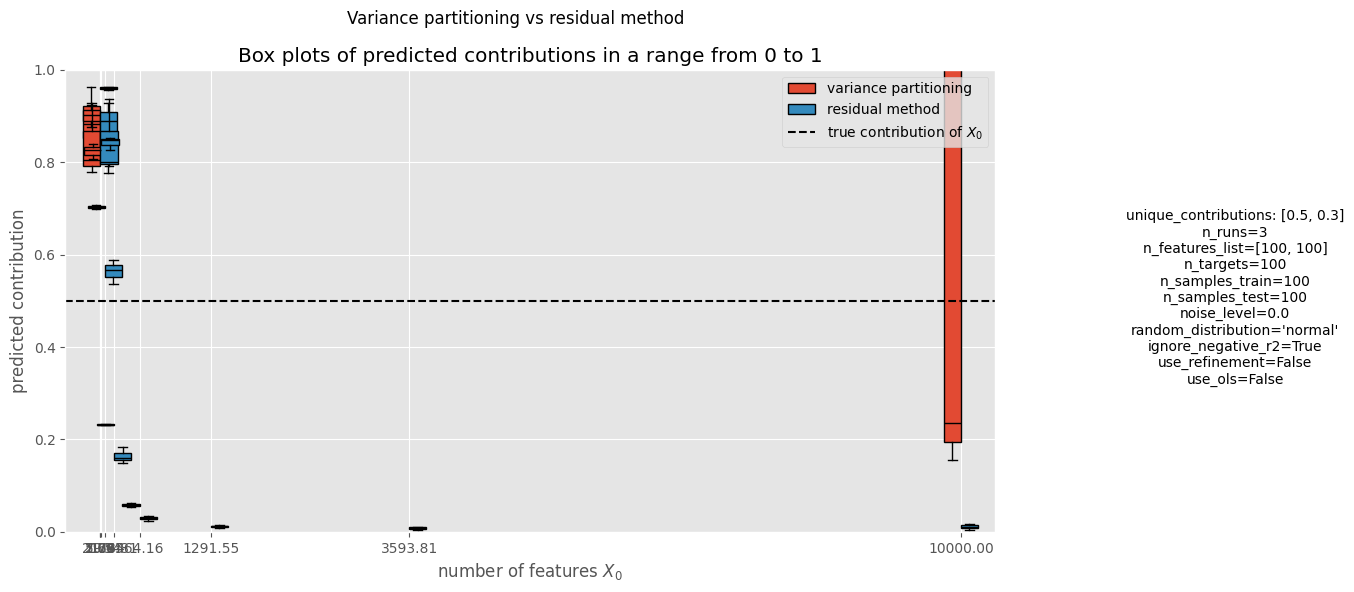

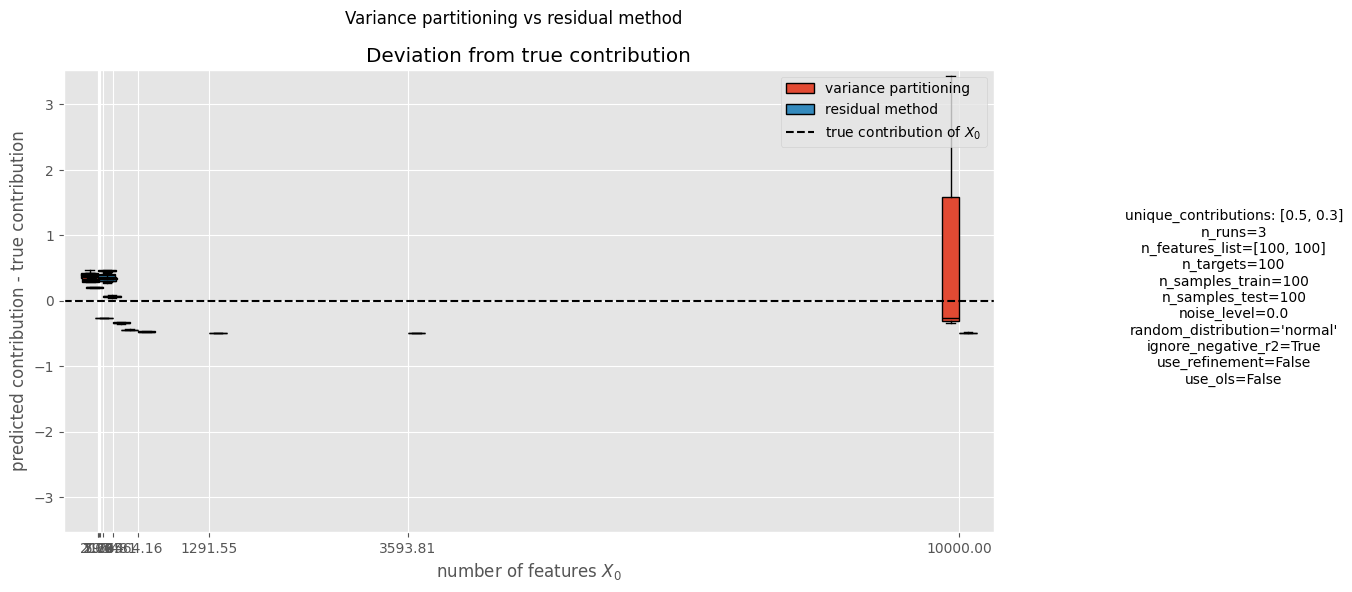

In [ ]:
plot_experiment(feature_sizes, variable_name, predicted_variance, predicted_residual, **variables)

## both $X_0$ and $X_1$

In [ ]:
variable_name = "number of features $X_{0,1}$"

In [ ]:
predicted_variance, predicted_residual = run_experiment(feature_sizes, variable_name, **variables)

In [ ]:
plot_experiment(feature_sizes, variable_name, predicted_variance, predicted_residual, **variables)

# varying target size

In [ ]:
variable_name = "number of targets"
target_sizes = np.logspace(0, 4, n_observations)

In [ ]:
predicted_variance, predicted_residual =run_experiment(target_sizes, variable_name, **variables)

In [ ]:
plot_experiment(target_sizes, variable_name, predicted_variance, predicted_residual, **variables)

# Test varying noise levels

In [ ]:
variable_name = "relative amount of noise in the target"
noise_levels = np.linspace(0, 1, n_observations)

In [ ]:
predicted_variance, predicted_residual = run_experiment(noise_levels, variable_name, **variables)

In [ ]:
plot_experiment(noise_levels, variable_name, predicted_variance, predicted_residual, **variables)

# Test varying unique contributions of $X_0$ and $X_1$

In [ ]:
variable_name = "proportions of unique contribution"
x0_unique_contributions = np.linspace(0, 1, n_observations)
# convert from np to python
x0_unique_contributions = [round(float(x), 2) for x in x0_unique_contributions]

In [ ]:
for x0_unique_contribution in x0_unique_contributions:
    contributions = [[x0_unique_contribution, round((1 - x0_unique_contribution) * x1 / (n_observations - 1), 2)] for
                     x1 in range(n_observations)]
    predicted_variance, predicted_residual = run_experiment(contributions, variable_name, **variables)
    plot_experiment(contributions, variable_name, predicted_variance, predicted_residual, **variables)